# VISUALIZING REAL WORLD DATA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math
import re
from PIL import Image

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Visit this dataset:<br>
* [Ohhhhh Oklahoma Quakes!](https://www.kaggle.com/ksuchris2000/oklahoma-earthquakes-and-saltwater-injection-wells)

___

## Brief class about Continental plates: North America

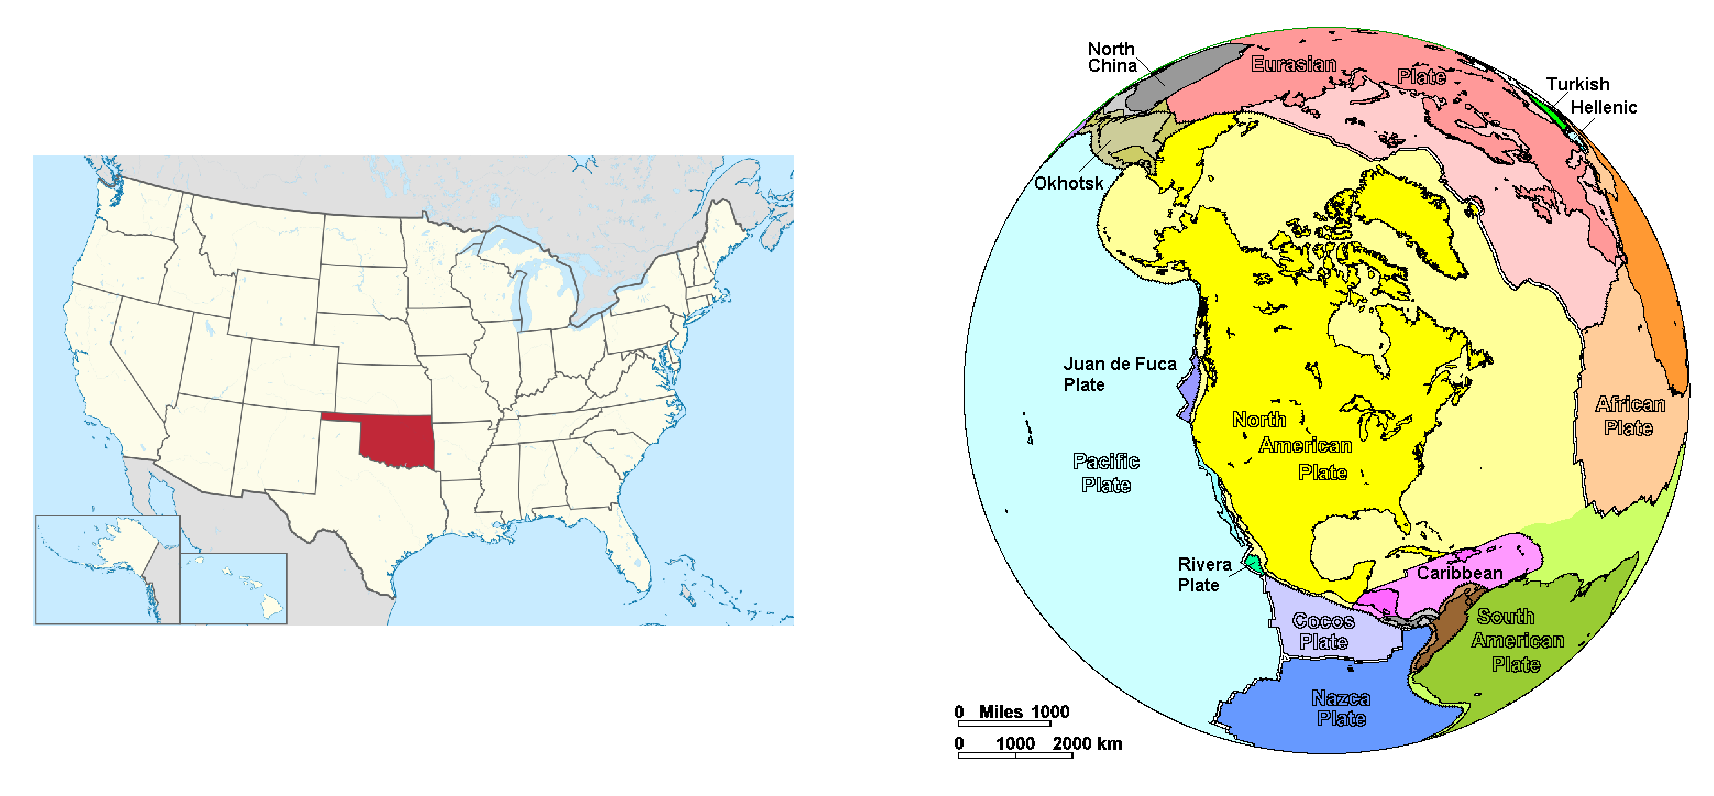

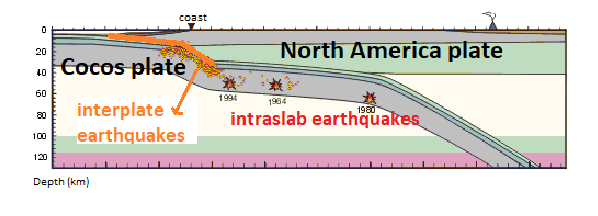

In [2]:
plt.close('all')
img1 = Image.open("data/oklahoma_state.png") 
img2 = Image.open("data/North_American_Plate.png") 
img3 = Image.open("data/intra_slab_quakes.png") 
fig=plt.figure(1,figsize=(30,20))
fig.add_subplot(121)
ax=plt.gca()
ax.axis('off')
plt.imshow(img1)
fig.add_subplot(122)
ax=plt.gca()
ax.axis('off')
plt.imshow(img2)

fig=plt.figure(2,figsize=(10,7))
ax=plt.gca()
ax.axis('off')
plt.imshow(img3)

___

In [3]:
# Reading InjectionWells.csv
wells=pd.read_csv('data/InjectionWells.csv')

# Removing all NaN columns and rows wich are completly filled with NaNs from wells dataframe
wells=wells.dropna(axis=1,how='all')
wells=wells.dropna(axis=0,how='all')

# Reading okQuakes.csv
quakes=pd.read_csv('data/okQuakes.csv')

# Removing all NaN columns and rows wich are completly filled with NaNs from quakes dataframe
quakes=quakes.dropna(axis=1,how='all')
quakes=quakes.dropna(axis=0,how='all')

Now some info of `wells` and `quakes` dataframes

In [4]:
print(chr(27)+"[1;31m"+'Injection Wells - Oklahoma'+chr(27)+"[0m"+"")
print("")
print(chr(27)+"[1;34m"+'  >>  Number of attributes: '+str(np.size(wells,1))+chr(27)+"[0m"+"")
print(chr(27)+"[1;34m"+'  >>  Number of instances:  '+str(np.size(wells,0))+chr(27)+"[0m"+"")
display(wells.head(3))
display(wells.tail(3))
display(wells.dtypes)
display(wells.describe())

Injection Wells - Oklahoma

  >>  Number of attributes: 18
  >>  Number of instances:  11125


,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,Twp,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE
0,3.500300e+09,PHOENIX PETROCORP INC,19499.0,2R,SE EUREKA UNIT-TUCKER #1,21,133856.0,9/6/1977,ALFALFA,13,28N,10W,C-SE SE,36.900324,-98.21826,"2,500",300,CHEROKEE
1,3.500300e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,CHRISTENSEN,1,470258.0,11/27/2002,ALFALFA,21,28N,09W,C-NW NW,36.896636,-98.17772,"2,400","1,000",RED FORK
2,3.500321e+09,LINN OPERATING INC,22182.0,2R,NE CHEROKEE UNIT,85,329426.0,8/19/1988,ALFALFA,24,27N,11W,SE NE,36.806113,-98.32584,"1,050","1,000",RED FORK


,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,Twp,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE
11122,3.515324e+09,"OVERFLOW ENERGY, LLC",22383.0,CDW,MUTUAL SWD,1,1.608510e+09,10/21/2016,WOODWARD,09,20N,18W,N2 NE NE,0.0,0.0,"1,625","25,000","DOUGLAS, WOLFCAMP"
11123,3.515324e+09,"RED MOUNTAIN OPERATING, LLC",23694.0,2D,HEDGES,1 SWD,1.703870e+09,12/28/2016,WOODWARD,14,21N,17W,SW SE SE,0.0,0.0,"1,550","15,000","VIRGILIAN, WOLFCAMP,"
11124,3.515324e+09,"RED MOUNTAIN OPERATING, LLC",23695.0,2D,GARVIE,1 SWD,1.703600e+09,12/28/2016,WOODWARD,33,21N,17W,NW NE NE,0.0,0.0,"1,550","15,000","ADMIRE, CHASE, COUNCIL GROVE, DOUGLAS, PONTOTO..."


API#             float64
Operator          object
Operator ID      float64
WellType          object
WellName          object
WellNumber        object
OrderNumbers     float64
Approval Date     object
County            object
Sec               object
Twp               object
Rng               object
QQQQ              object
LAT              float64
LONG             float64
PSI               object
BBLS              object
ZONE              object
dtype: object

,API#,Operator ID,OrderNumbers,LAT,LONG
count,1.112500e+04,11125.000000,1.112400e+04,11125.000000,11125.000000
mean,3.508264e+09,18212.844225,3.079450e+08,35.207878,-96.849979
std,4.833633e+06,8922.533405,5.886448e+08,2.689511,7.575851
min,3.500300e+09,153.000000,1.939300e+04,0.000000,-203.625566
25%,3.503710e+09,14156.000000,1.711480e+05,34.441536,-97.631560
50%,3.509320e+09,19467.000000,3.880600e+05,35.154533,-97.366105
75%,3.513304e+09,22220.000000,5.697722e+05,36.124345,-96.537961
max,3.515324e+09,510758.000000,1.701070e+10,73.986030,97.695750


In [5]:
print(chr(27)+"[1;31m"+'Earthquakes - Oklahoma'+chr(27)+"[0m"+"")
print("")
print(chr(27)+"[1;34m"+'  >>  Number of attributes: '+str(np.size(quakes,1))+chr(27)+"[0m"+"")
print(chr(27)+"[1;34m"+'  >>  Number of instances:  '+str(np.size(quakes,0))+chr(27)+"[0m"+"")
display(quakes.head(3))
display(quakes.tail(3))
display(quakes.dtypes)
display(quakes.describe())

Earthquakes - Oklahoma

  >>  Number of attributes: 22
  >>  Number of instances:  13954


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1973-03-17T07:43:05.500Z,36.087,-106.168,6.0,4.5,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:10.078Z,New Mexico,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1,1973-05-25T14:40:13.900Z,33.917,-90.775,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:12.859Z,Mississippi,earthquake,NaN,NaN,NaN,NaN,reviewed,s,us
2,1973-09-19T13:28:20.500Z,37.160,-104.594,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:20.295Z,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
13951,2016-09-20T16:01:08.610Z,37.277167,-98.072667,5.85,2.43,ml,15.0,237.0,0.05185,0.04,...,2016-09-20T19:08:23.720Z,"4km WSW of Harper, Kansas",earthquake,0.38,0.33,0.179,17.0,reviewed,ismp,ismp
13952,2016-09-20T17:31:48.380Z,36.939300,-97.896000,2.32,3.00,mb_lg,NaN,37.0,0.05600,0.18,...,2016-09-20T17:43:43.040Z,"20km NW of Medford, Oklahoma",earthquake,1.00,3.70,0.076,45.0,reviewed,us,us
13953,2016-09-20T17:45:59.920Z,36.940500,-97.906300,7.20,2.50,mb_lg,NaN,39.0,0.04800,0.35,...,2016-09-20T19:48:57.396Z,"21km NW of Medford, Oklahoma",earthquake,1.00,3.40,0.170,9.0,reviewed,us,us


time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,13954.000000,13954.000000,13954.000000,13948.000000,5389.000000,12433.000000,5621.000000,12749.000000,10756.000000,12144.000000,6055.000000,6133.000000
mean,36.184965,-96.937925,5.203888,2.509353,12.790499,95.294764,0.101106,0.408604,1.396304,4.026846,0.157626,16.262188
std,0.973078,2.681658,2.089153,0.580815,14.377587,44.094697,0.183122,0.310978,1.428283,3.116048,0.114046,18.511682
min,31.076000,-106.732000,0.000000,0.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.590075,-97.941325,4.400000,2.100000,8.000000,64.000000,0.027000,0.090000,0.600000,1.200000,0.088000,4.000000
50%,36.310000,-97.515450,5.000000,2.600000,11.000000,85.000000,0.043340,0.400000,1.300000,3.655000,0.139000,13.000000
75%,36.871700,-96.907900,6.034000,2.900000,15.000000,117.000000,0.089370,0.610000,1.800000,6.900000,0.189000,19.000000
max,40.660000,-90.660000,56.210000,5.800000,474.000000,340.000000,2.380000,2.680000,99.000000,99.000000,1.369000,190.000000


## Step 1. Mod Dates
I am going to modificate dates format from `str object` to `datetime object` so I can operate with them

In [6]:
# Lets modify column PSI, its an object type array. Seems to be int object but with ',' so its converted to str object
wells['PSI']=wells['PSI'].str.replace(',','')
finalpsi=[]
counter=0
sumando=0
for item in wells['PSI']:
    try:
        elem=str(item).split('/')
        PSIp=max([re.sub('\D','',e) for e in elem])
        finalpsi.append(int(PSIp))
        counter+=1
        sumando+=int(PSIp)
    except:
        finalpsi.append(np.nan)
meanpsi=int(sumando//counter)
wells['PSI']=wells['PSI'].fillna(meanpsi)


wells['Starting Date_norm']=[datetime.strptime(item, '%m/%d/%Y') for item in wells['Approval Date']]
wells['Starting Date']=[str(item.strftime('%m/%d/%Y')) for item in wells['Starting Date_norm']]
quakes['Quake Date_norm']=[datetime.strptime(item.split('T')[0], '%Y-%m-%d') for item in quakes['time']]
quakes['Quake Date']=[str(item.strftime('%m/%d/%Y')) for item in quakes['Quake Date_norm']]

quakes['magType']=quakes['magType'].replace('mb_lg','mblg')

# Step 2. Sortig files by Date Attribute. Then reorder dates

In [7]:
wells=wells.sort_values('Starting Date_norm').reset_index(drop=True)
quakes=quakes.sort_values('Quake Date_norm').reset_index(drop=True)
wells=wells.drop(['Approval Date'],axis=1)
quakes=quakes.drop(['time'],axis=1)

In [8]:
display(wells.head(3))
display(quakes.head(3))

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,County,Sec,Twp,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE,Starting Date_norm,Starting Date
0,3.501923e+09,XTO ENERGY INC,21003.0,2R,HEWITT UNIT 22,1103,306804.0,CARTER,22,04S,02W,SW NE NW,34.199067,-97.399092,1100,"3,500","HEWITT (HOXBAR, DEESE)",1936-12-18,12/18/1936
1,3.514707e+09,GATEWAY RESOURCES USA INC,18192.0,2R,ANDY BROWN,3-W,32310.0,WASHINGTON,22,28N,13E,NW NE NE,36.901903,-95.900888,3110,NaN,WAYSIDE,1945-04-22,04/22/1945
2,3.508104e+09,WHITE MONTY & TERRY PRODUCTION,12538.0,2D,"ROLLER, B. H.",1,19393.0,LINCOLN,15,12N,05E,SE NW SW,35.511472,-96.767417,0,100,UNKNOWN FORMATION,1946-10-19,10/19/1946


,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Quake Date_norm,Quake Date
0,36.087,-106.168,6.0,4.5,mb,NaN,NaN,NaN,NaN,us,...,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1973-03-17,03/17/1973
1,33.917,-90.775,6.0,NaN,NaN,NaN,NaN,NaN,NaN,us,...,earthquake,NaN,NaN,NaN,NaN,reviewed,s,us,1973-05-25,05/25/1973
2,37.160,-104.594,5.0,NaN,NaN,NaN,NaN,NaN,NaN,us,...,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1973-09-19,09/19/1973


In [9]:
display(quakes['Quake Date'].head(3))
display(wells['Starting Date'].head(3))

0    03/17/1973
1    05/25/1973
2    09/19/1973
Name: Quake Date, dtype: object

0    12/18/1936
1    04/22/1945
2    10/19/1946
Name: Starting Date, dtype: object

## Step 3. Creating a common index 
Relates wells to earthquakes in function to its distance to the well (>50 kilometers) and for a time interval between two consecutive wells.
If there is more than one well for that date, it will check them one by one

In [10]:
def calc_distances(lat1,lon1,lat2,lon2,R=6371):
    lat1=lat1*math.pi/180
    lon1=lon1*math.pi/180
    lat2=lat2*math.pi/180
    lon2=lon2*math.pi/180
    """
    Calculating distances between 2 coordinates
    
    As input: latitude and longitude for coord 1
              latitude and longitude for coord 2
              
    As output: DISTANCE! in absolute measure, no signs returned
    """
    a = math.sin((lat2 - lat1) / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin((lon2 - lon1) / 2)**2
    c = 2 * math.atan2(np.sqrt(a), np.sqrt(1 - a))
    return abs(R*c)

In [11]:
%%time
dates_u=wells['Starting Date']
already_done=[]
indexer=1
wells['ID']=-1
quakes['ID']=-1
for j in range(len(dates_u)-1):
    if dates_u[j] not in already_done:
        already_done.append(dates_u[j])
        df1=wells[wells['Starting Date']==dates_u[j]]
        df1_indexes=df1.index
        date_norm0=datetime.strptime(dates_u[j],'%m/%d/%Y')
        date_norm1=datetime.strptime(dates_u[j+1],'%m/%d/%Y')
        for i in range(len(df1)):
            
            lat1=df1['LAT'].iloc[i]
            lon1=df1['LONG'].iloc[i]
            
            df2=quakes[(quakes['Quake Date_norm']>=date_norm0)&(quakes['Quake Date_norm']<date_norm1)]
            df2_indexes=df2.index

            for k in range(len(df2)):
                lat2=df2['latitude'].iloc[k]
                lon2=df2['longitude'].iloc[k]
                distance=calc_distances(lat1,lon1,lat2,lon2)
                if distance<=50:
                    quakes.loc[df2_indexes[k],'ID']=indexer

            wells.loc[df1_indexes[i],'ID']=indexer

            indexer+=1

CPU times: user 29.7 s, sys: 0 ns, total: 29.7 s
Wall time: 29.7 s


## Step 4. Mergin data on ID feature

In [12]:
# Selecting features for 
wells_mod=wells[['Starting Date','ID','Operator ID', 'WellType', 'LAT', 'LONG','PSI']].copy()
quakes_mod=quakes[['Quake Date', 'ID', 'depth', 'mag', 'magType','latitude', 'longitude']].copy()

In [13]:
# Inner Join by ID
merged=wells_mod.merge(quakes_mod,on='ID',how='inner')
merged['PSI']=merged['PSI'].astype('float64')
merged['Starting Date_num']=[datetime.strptime(item,'%m/%d/%Y') for item in merged['Starting Date']]
merged=merged.sort_values('Starting Date_num')
display(merged.head(3))
display(merged.tail(3))

,Starting Date,ID,Operator ID,WellType,LAT,LONG,PSI,Quake Date,depth,mag,magType,latitude,longitude,Starting Date_num
0,01/30/1984,3466,22628.0,2R,34.421843,-97.607447,3000.0,02/03/1984,5.0,3.2,mblg,34.657,-97.394,1984-01-30
1,12/30/1985,3842,14156.0,2R,34.362155,-97.471424,2000.0,12/31/1985,5.0,2.7,mblg,34.760,-97.484,1985-12-30
2,03/12/1987,4047,17498.0,2D,34.911936,-96.816498,300.0,03/14/1987,5.0,2.8,mblg,34.790,-96.331,1987-03-12


,Starting Date,ID,Operator ID,WellType,LAT,LONG,PSI,Quake Date,depth,mag,magType,latitude,longitude,Starting Date_num
225,08/08/2016,10851,21902.0,2R,36.166290,-96.50715,1250.0,08/13/2016,9.560,2.3,mblg,36.1906,-96.9731,2016-08-08
224,08/08/2016,10851,21902.0,2R,36.166290,-96.50715,1250.0,08/11/2016,5.266,2.5,ml,36.1804,-96.9714,2016-08-08
226,08/26/2016,10860,20720.0,2R,35.747267,-96.43530,300.0,08/29/2016,4.670,1.5,mblg,35.7846,-96.9872,2016-08-26


## Step 5. Visualize data

### Earthqueake Magnitude distribution

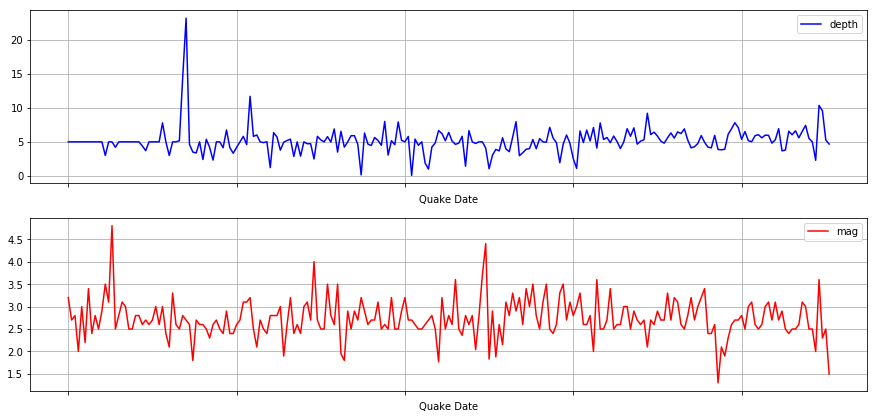

In [14]:
fig,axes=plt.subplots(2,1,figsize=(15,7))
merged.plot(x='Quake Date',y='depth',ax=axes[0],color='blue')
merged.plot(x='Quake Date',y='mag',ax=axes[1],color='red')
axes[0].grid()
axes[1].grid()

/home/ivan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


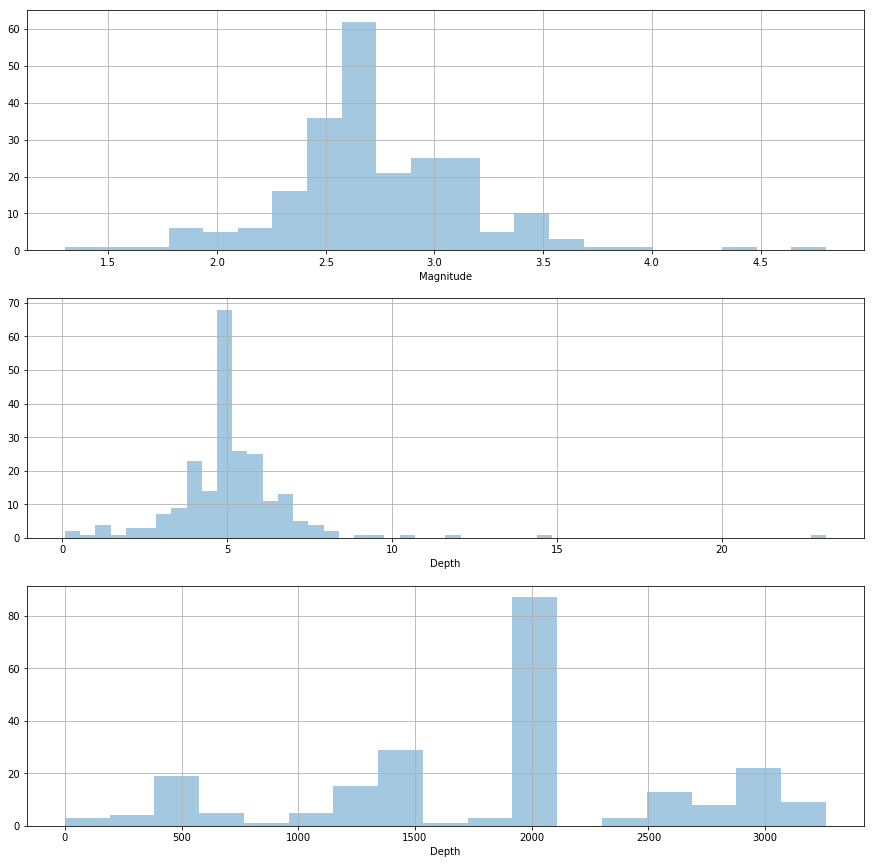

In [15]:
fig,axes=plt.subplots(3,1,figsize=(15,15))
sns.distplot(merged['mag'],ax=axes[0],kde=False)
axes[0].set_xlabel('Magnitude')
axes[0].grid()
sns.distplot(merged['depth'],ax=axes[1],kde=False)
axes[1].set_xlabel('Depth')
axes[1].grid()
sns.distplot(merged['PSI'],ax=axes[2],kde=False)
axes[2].set_xlabel('Depth')
axes[2].grid()

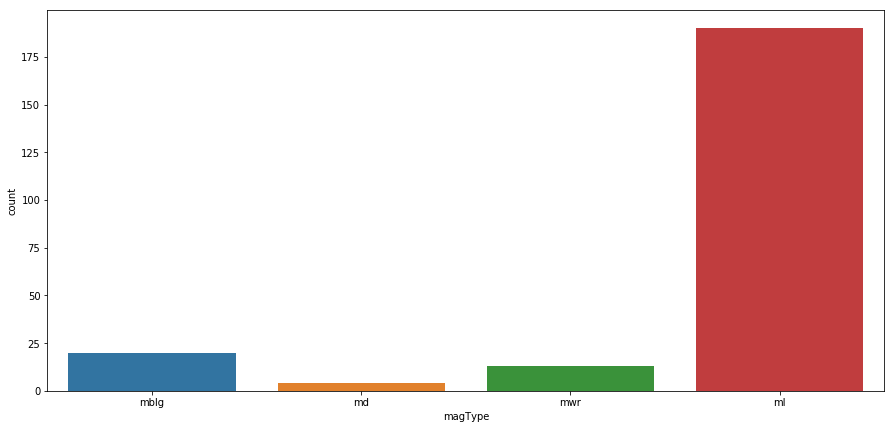

In [16]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(merged['magType'],ax=ax)

[About earthquakes magnitude](https://earthquake.usgs.gov/learn/glossary/?term=magnitude)

<Figure size 432x288 with 0 Axes>

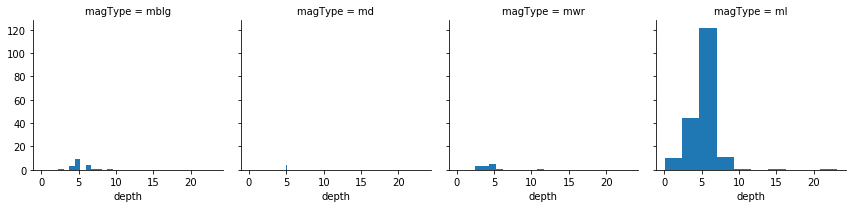

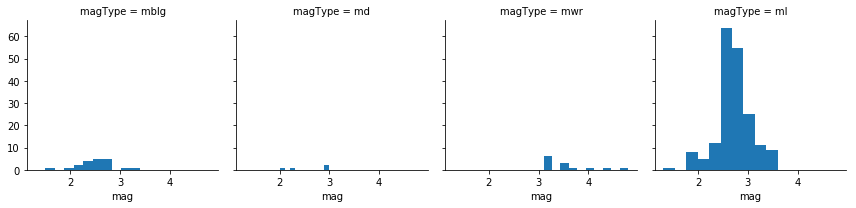

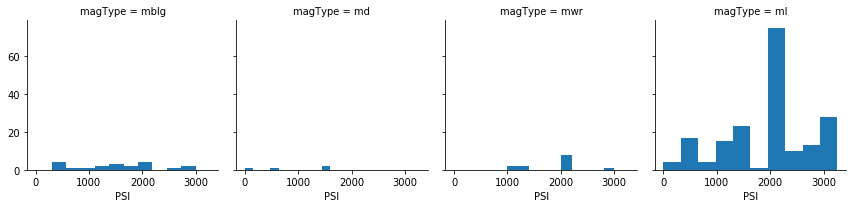

In [17]:
fig=plt.figure(1)
g=sns.FacetGrid(merged,col='magType')
g.map(plt.hist, "depth")

fig=plt.figure(2)
g=sns.FacetGrid(merged,col='magType')
g.map(plt.hist, "mag")

fig=plt.figure(3)
g=sns.FacetGrid(merged,col='magType')
g.map(plt.hist, "PSI")

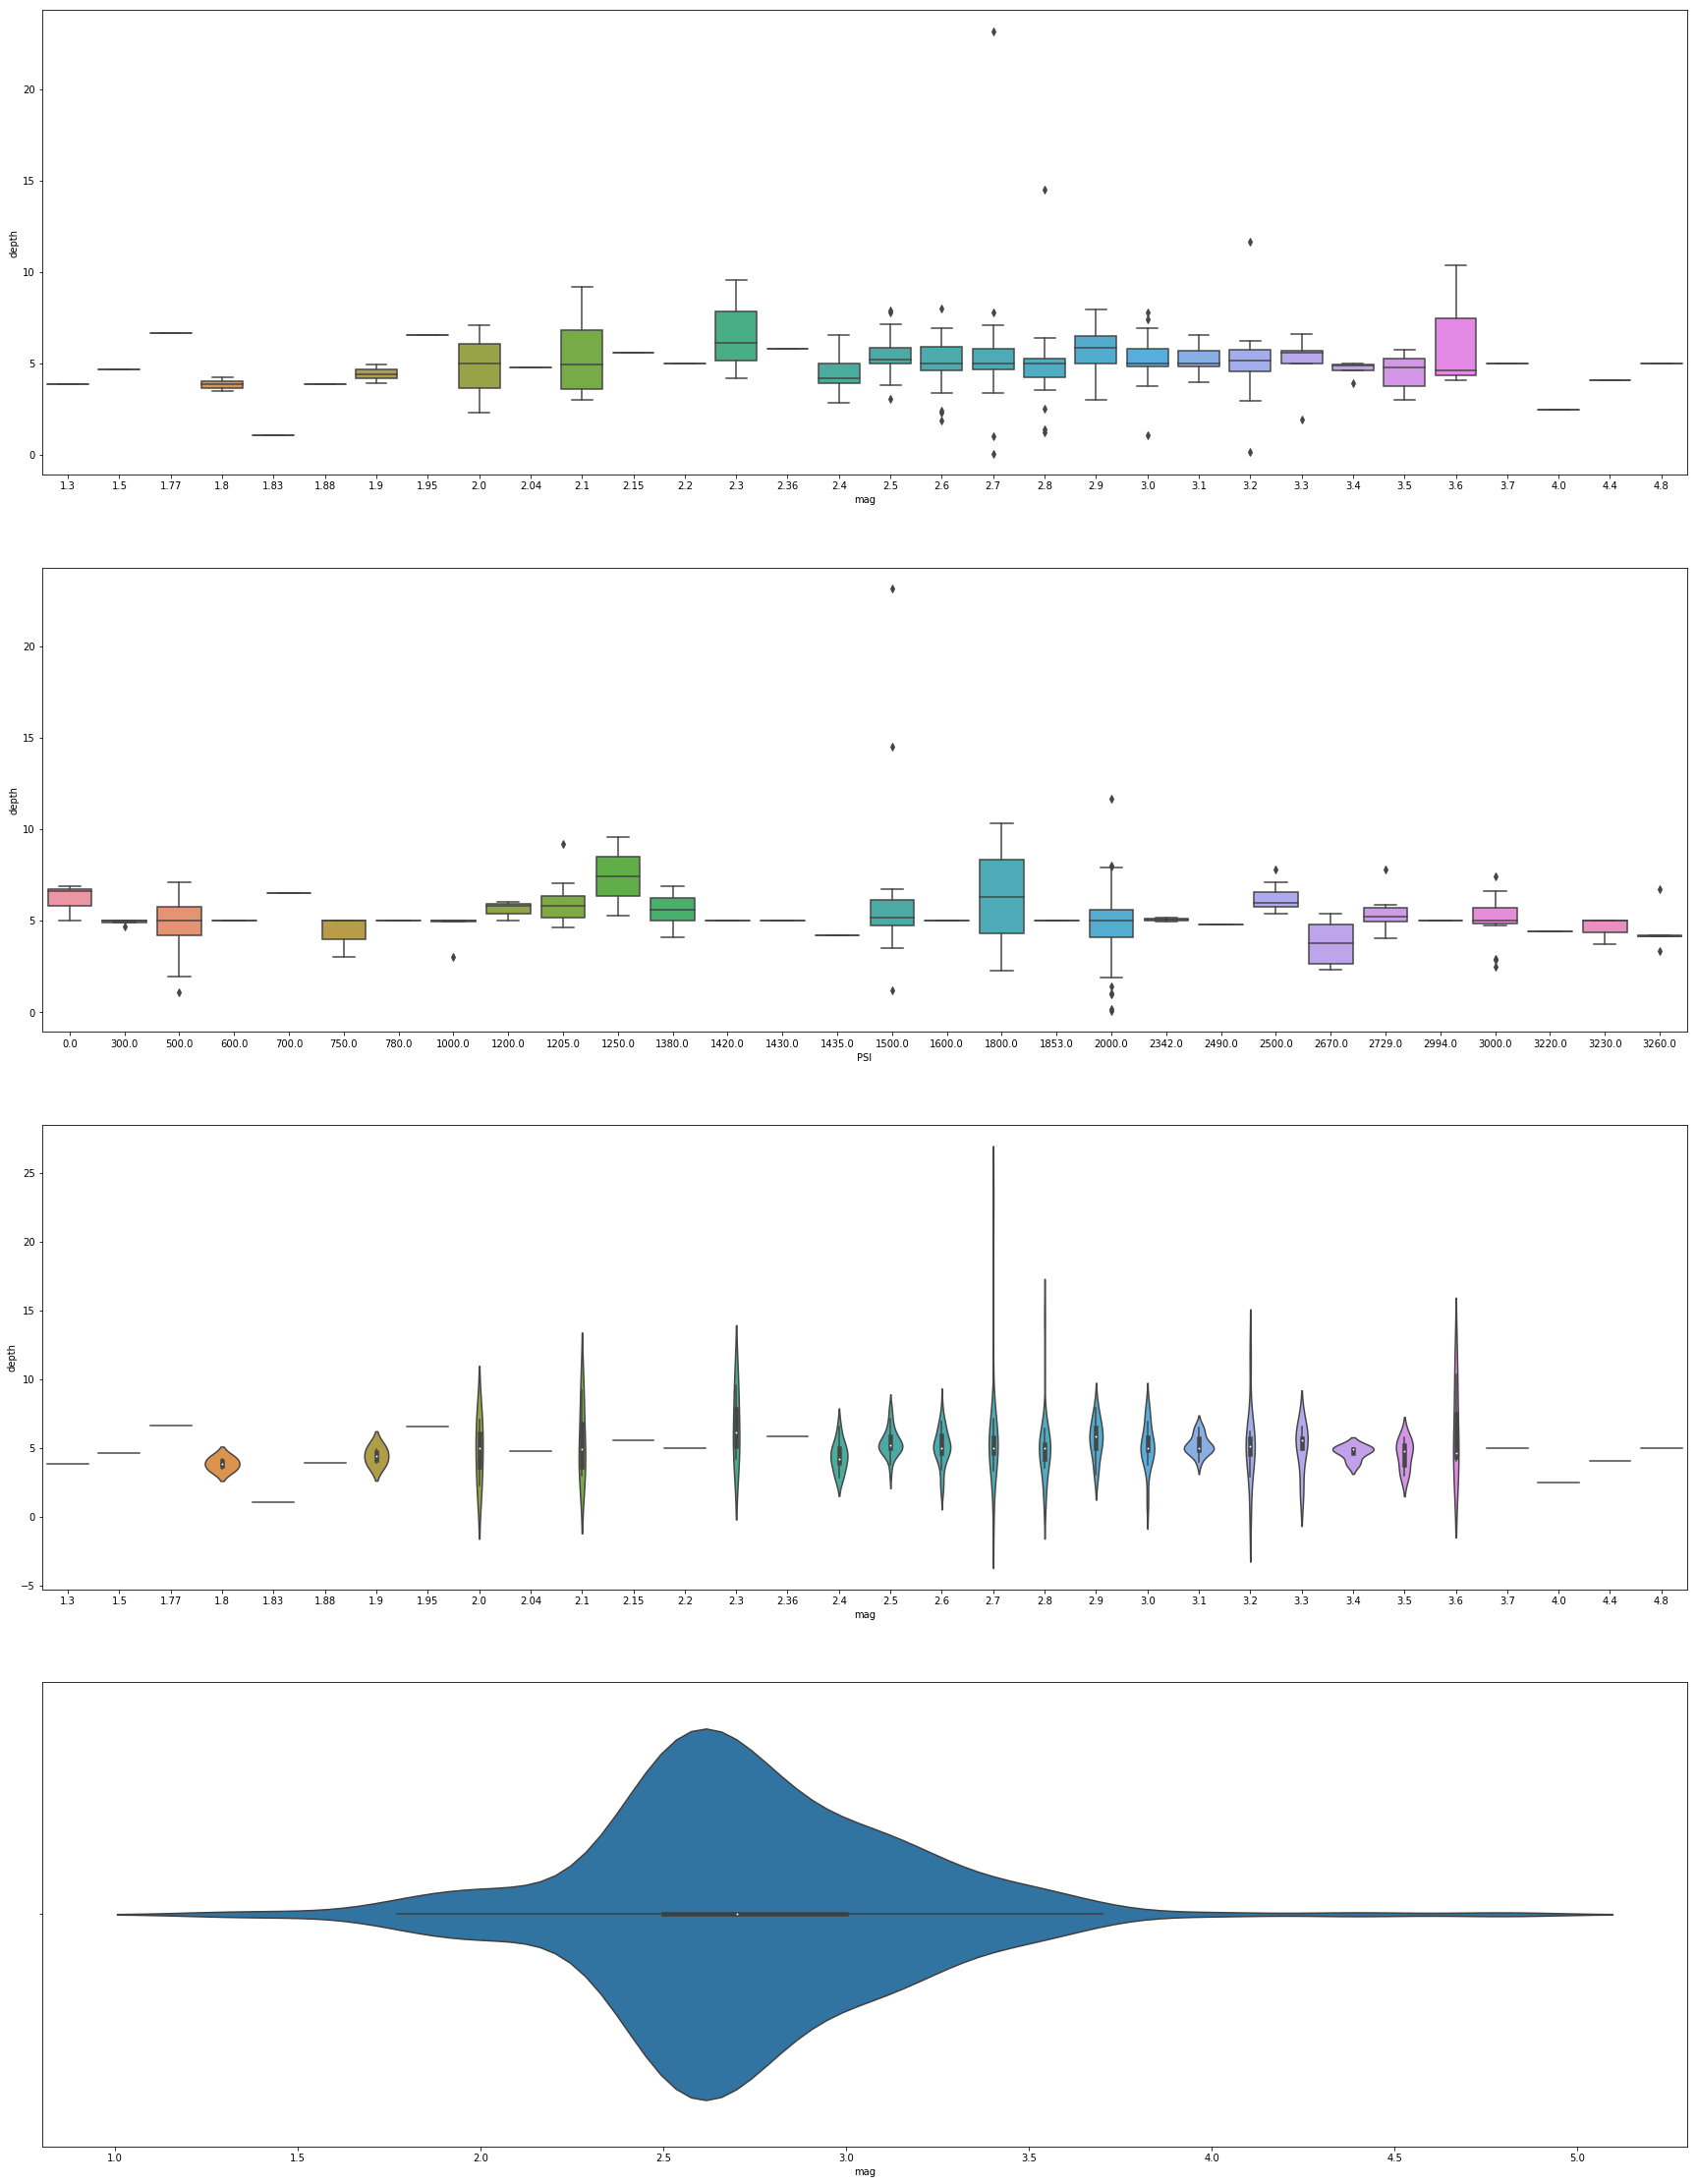

In [18]:
fig,axes=plt.subplots(4,1,figsize=(30,40))
sns.boxplot(x='mag',y='depth',data=merged,ax=axes[0])
sns.boxplot(x='PSI',y='depth',data=merged,ax=axes[1])
sns.violinplot(x='mag',y='depth',data=merged,ax=axes[2])
sns.violinplot(x='mag',data=merged,ax=axes[3])

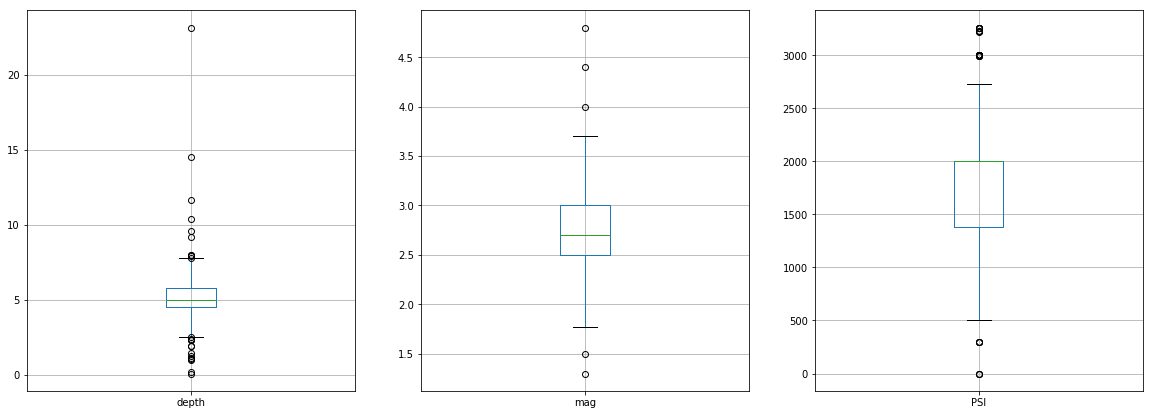

In [19]:
fig,axes=plt.subplots(1,3,figsize=(20,7))
merged.boxplot(column='depth',ax=axes[0])
merged.boxplot(column='mag',ax=axes[1])
merged.boxplot(column='PSI',ax=axes[2])

Text(0.5, 1.0, 'Pearson Correlation Coeficients')

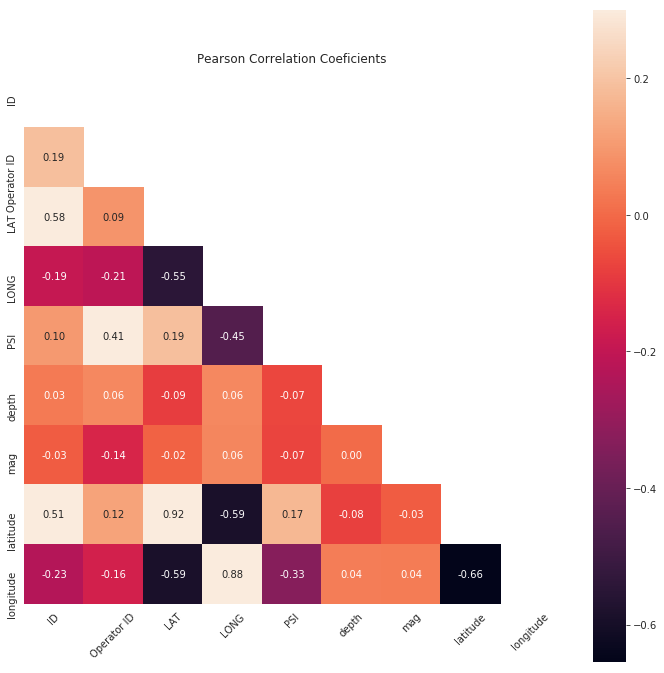

In [20]:
plt.figure(1,figsize=(12,12))
corr = merged.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, fmt=".2f")

plt.xticks(np.arange(len(corr.columns))+0.5, corr.columns);
plt.yticks(np.arange(len(corr.columns))+0.5, corr.columns)
ax.xaxis.set_tick_params(rotation=45)
ax.set_title('Pearson Correlation Coeficients')

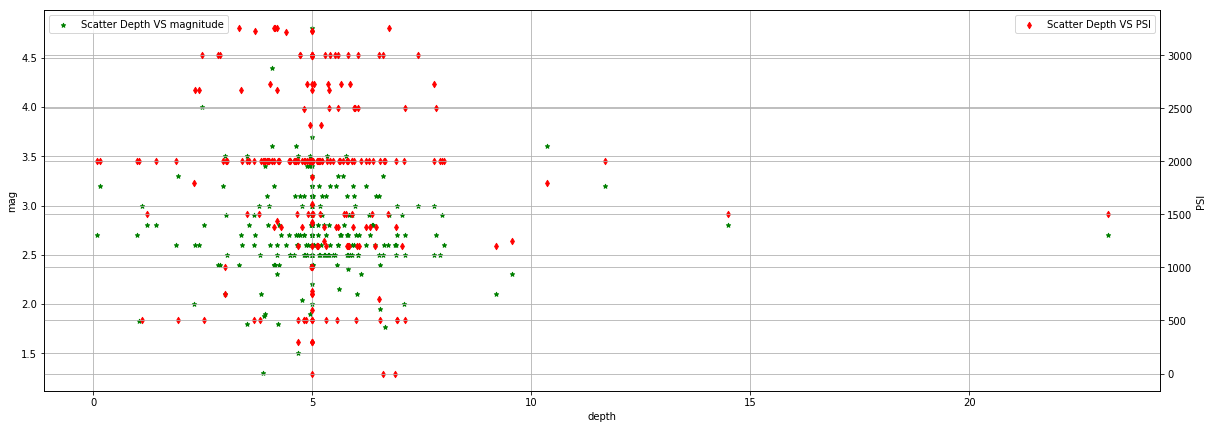

In [21]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,7))
merged.plot(x="depth", y="mag", kind='scatter',ax=axes,color='green',marker='*')
axes.legend(['Scatter Depth VS magnitude'],loc='upper left')
axes.grid()
ax1=axes.twinx()
merged.plot(x="depth", y="PSI", kind='scatter',color='red',ax=ax1,marker='d')
ax1.legend(['Scatter Depth VS PSI'],loc='upper right')
ax1.grid()

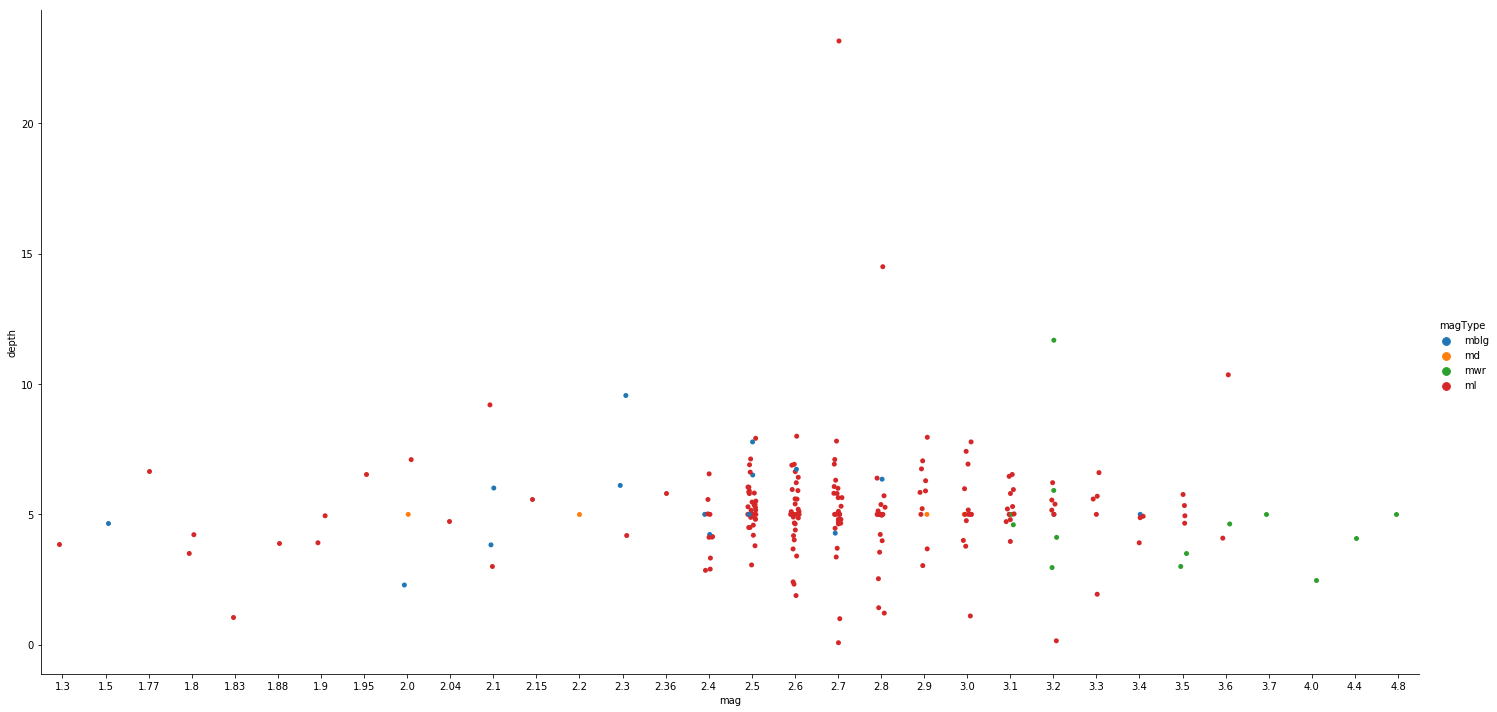

In [22]:
g = sns.catplot(x="mag", y="depth", hue="magType", data=merged,height=10, aspect=2)

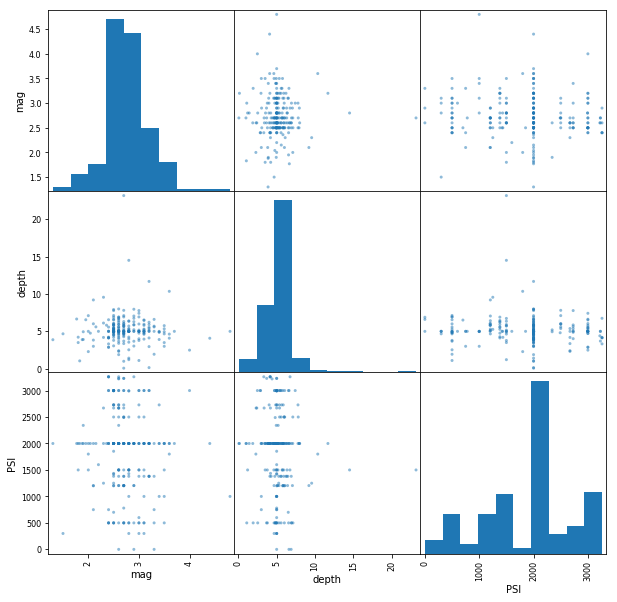

In [24]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
b=pd.plotting.scatter_matrix(merged[['mag','depth','PSI']],ax=ax)

___